# Simple Random Walk

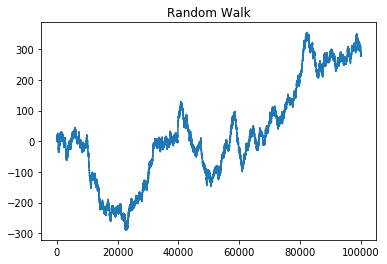

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(1995)
np.random.seed(1995)

steps = 100000
y = []
x = []
for i in range(steps):
    tmp = random.randint(0,1)
    if tmp == 0:
        tmp = -1
    x.append(tmp)
    y.append(i+1)
    
x = np.cumsum(x)
plt.plot(y,x)
plt.title('Random Walk')
plt.show()
plt.close()

# Brownian Motions

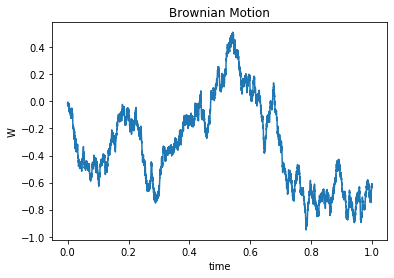

In [12]:
# Parameters
N = 10000
T = 1

dt = T/N
time = []
for i in range(N):
    time.append(i*dt)

# Brownian motion
mu = 0
sigma = 1
dW = np.sqrt(dt)*np.random.normal(loc = mu, scale = sigma, size = (N,1))
W = np.cumsum(dW)

plt.plot(time, W)
plt.xlabel("time")
plt.ylabel("W")
plt.title("Brownian Motion")
plt.show()
plt.close()

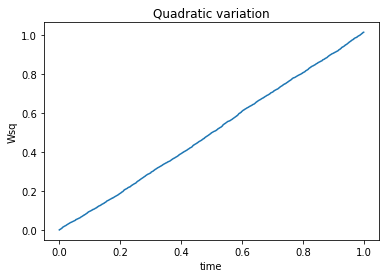

In [13]:
# Quadratic variation
dWsq = dW**2
Wsq = np.cumsum(dWsq)

plt.plot(time, Wsq)
plt.xlabel("time")
plt.ylabel("Wsq")
plt.title("Quadratic variation")
plt.show()
plt.close()

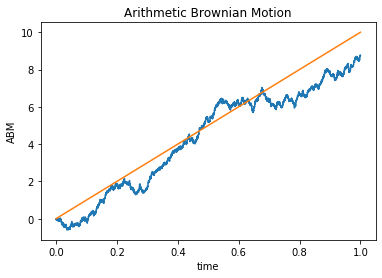

In [14]:
# Arithmetic BM: dSt = a*dt + b*dWt
a = 10
b = 2
X0 = 0
time = np.array(time)
X_trend = X0 + a*time
X = X0 + a*time + b*W

plt.plot(time, X)
plt.plot(time, X_trend)
plt.xlabel("time")
plt.ylabel("ABM")
plt.title("Arithmetic Brownian Motion")
plt.show()
plt.close()

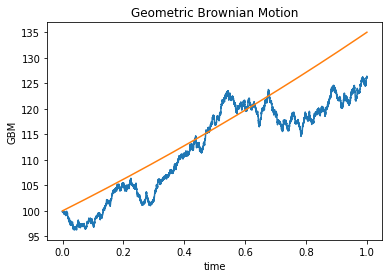

In [15]:
# Geometric BM: dSt = aStdt + bStdWt
a = 0.3
b = 0.1
S0 = 100
S_trend = S0*np.exp(a*time)
S = S0*np.exp(((a - 0.5*b**2) * time) + b*W)

plt.plot(time, S)
plt.plot(time, S_trend)
plt.xlabel("time")
plt.ylabel("GBM")
plt.title("Geometric Brownian Motion")
plt.show()
plt.close()

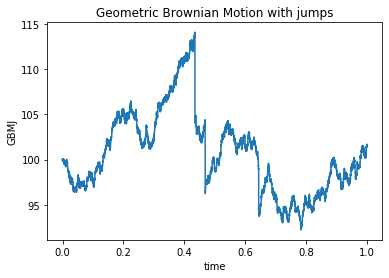

In [16]:
# Geometric BM with jumps - note: no lambda and teta parameters in drift
number_jumps = 3
teta = -0.05 # mean of jumps
gamma = 0.05 # std of jumps
jump_times = []
for j in range(number_jumps):
    tmp = random.randint(0,N)
    jump_times.append(tmp)

S = [S0]
for i in range(1,N):
    if i in jump_times:
        Si = S[-1]*np.exp(((a - 0.5*b**2) * (time[i]-time[i-1])) + b*(W[i]-W[i-1])
        + np.random.normal(loc=teta, scale=gamma))
    else:
        Si = S[-1]*np.exp(((a - 0.5*b**2) * (time[i]-time[i-1])) + b*(W[i]-W[i-1]))
    S.append(Si)

plt.plot(time, S)
plt.xlabel("time")
plt.ylabel("GBMJ")
plt.title("Geometric Brownian Motion with jumps")
plt.show()
plt.close()